<a href="https://colab.research.google.com/github/Cordero27/Minor-Machine-Learning/blob/main/Analisis%20Dataset%20Memoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de conjunto de datos preliminar para Memoria

### El Conjunto de datos a estudiar pertenece a la captura de datos de una colmena de abejas saludable durante dos meses. Los parámetros medidos son Humedad, Temperatura, Peso y el flujo de entrada y salida de abejas a la colmena. Cabe destacar que esto último considera los valores positivos como ingresos y negativos los egresos de la colmena.

## Para procesar este conjunto de datos se usa OSEMN.

###Entrega 01 - OBTAIN

In [68]:
import numpy as np
#Librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Fuente del dataset: https://www.kaggle.com/datasets/se18m502/bee-hive-metrics

flow = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/DatasetPreparado/flow.csv', on_bad_lines='skip')
humidity = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/DatasetPreparado/humidity.csv', on_bad_lines='skip')
temperature = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/DatasetPreparado/temperature.csv', on_bad_lines='skip')
weight = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/DatasetPreparado/weight.csv', on_bad_lines='skip')

#Observamos el contenido adquirido del archivo del flujo
flow.head()

,timestamp,flow
0,2023-03-01 00:00:00,-8.0
1,2023-03-01 00:01:00,-11.0
2,2023-03-01 00:02:00,-11.0
3,2023-03-01 00:03:00,-11.0
4,2023-03-01 00:04:00,-13.0


In [69]:
"""
from google.colab import files
anterior = "";
for index, row in flow.iterrows():
  nombre = row['timestamp']
  if "2023" in nombre:
    anterior = nombre
  else:
    #print("Anterior: ", anterior)
    #print(nombre)
    anteriorDividido = anterior.split(" ")
    anteriorDividido2 = anteriorDividido[1].split(":")
    #print("linea: ", index)
    #print(anteriorDividido2)
    valor = int(anteriorDividido2[1])
    valor0 = int(anteriorDividido2[0])
    valor = valor + 1
    if (valor == 60):
      valor0 = valor0 + 1
      valor = 0
    anteriorDividido2[0] = str(valor0)
    if (valor0 < 10):
      anteriorDividido2[0] = "0" + anteriorDividido2[0]
    anteriorDividido2[1] = str(valor)
    if (valor < 10):
      anteriorDividido2[1] = "0" + anteriorDividido2[1]
    casiListo = anteriorDividido2[0] + ":" + anteriorDividido2[1] + ":" + anteriorDividido2[2]
    listo = anteriorDividido[0] + " " + casiListo
    #print("Listo: ", listo)
    flow.at[index, 'timestamp'] = listo
    flow.at[index, 'flow'] = 0
    anterior = listo
    fila_completa = flow.loc[index,:]
flow.to_csv("nuevo_flow.csv", index=False)
files.download('nuevo_flow.csv')
"""

'\nfrom google.colab import files\nanterior = "";\nfor index, row in flow.iterrows():\n  nombre = row[\'timestamp\']\n  if "2023" in nombre:\n    anterior = nombre\n  else:\n    #print("Anterior: ", anterior)\n    #print(nombre)\n    anteriorDividido = anterior.split(" ")\n    anteriorDividido2 = anteriorDividido[1].split(":")\n    #print("linea: ", index)\n    #print(anteriorDividido2)\n    valor = int(anteriorDividido2[1])\n    valor0 = int(anteriorDividido2[0])\n    valor = valor + 1\n    if (valor == 60):\n      valor0 = valor0 + 1\n      valor = 0\n    anteriorDividido2[0] = str(valor0)\n    if (valor0 < 10):\n      anteriorDividido2[0] = "0" + anteriorDividido2[0]\n    anteriorDividido2[1] = str(valor)\n    if (valor < 10):\n      anteriorDividido2[1] = "0" + anteriorDividido2[1]\n    casiListo = anteriorDividido2[0] + ":" + anteriorDividido2[1] + ":" + anteriorDividido2[2]\n    listo = anteriorDividido[0] + " " + casiListo\n    #print("Listo: ", listo)\n    flow.at[index, \'time

In [ ]:
#Observamos el contenido adquirido del archivo de la flujo
flow.head()

In [70]:
#Observamos el contenido adquirido del archivo de la humedad
humidity.head()

,timestamp,humidity
0,2023-08-01 00:00:00,55.967000
1,2023-08-01 01:00:00,55.923000
2,2023-08-01 02:00:00,55.962167
3,2023-08-01 03:00:00,56.101500
4,2023-08-01 04:00:00,56.203333


In [71]:
#Observamos el contenido adquirido del archivo de la temperatura
temperature.head()

,timestamp,temperature
0,2023-08-01 00:00:00,25.691667
1,2023-08-01 01:00:00,24.830833
2,2023-08-01 02:00:00,24.557833
3,2023-08-01 03:00:00,24.204000
4,2023-08-01 04:00:00,23.450333


In [72]:
#Observamos el contenido adquirido del archivo del peso
weight.head()

,timestamp,weight
0,2023-08-01 00:00:00,61.4797
1,2023-08-01 00:01:00,61.4797
2,2023-08-01 00:02:00,61.4789
3,2023-08-01 00:03:00,61.4789
4,2023-08-01 00:04:00,61.4799


###Entrega 02 - SCRUB

Comenzamos verificando si exiten valores NAs en los conjuntos de datos

In [73]:
#Verificamos si existen NAs dentro del conjunto de datos.
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  87840 non-null  object 
 1   flow       87840 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [74]:
#Verificamos si existen NAs dentro del conjunto de datos.
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1464 non-null   object 
 1   humidity   1464 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [75]:
#Verificamos si existen NAs dentro del conjunto de datos.
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1464 non-null   object 
 1   temperature  1464 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [76]:
#Verificamos si existen NAs dentro del conjunto de datos.
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  87840 non-null  object 
 1   weight     87840 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


Como observamos, solo se detectan NAs en el archivo de la temperatura, pues en este es el único donde varía la cantidad de filas que contiene con la cantidad de elementos not-null encontrados. Pero como solo son 3 elementos, revisamos el archivo para en lugar de eliminarlas, podemos insertar un valor consistente a los cercanos

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*

In [77]:
print(flow.info())
print("_________________________________________")
print(humidity.info())
print("_________________________________________")
print(temperature.info())
print("_________________________________________")
print(weight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  87840 non-null  object 
 1   flow       87840 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1464 non-null   object 
 1   humidity   1464 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1464 non-null   object 
 1   temperature  1464 non-null   f

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'float64'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

In [78]:
#Finalmente, ya podemos cambiar el tipado de la columna, y aprovechamos de pasar la otra columna tipo object (activity) por category
#flow.loc[:, "flow"] = flow.astype({'flow': 'int16'})
humidity.loc[:, "humidity"] = humidity.astype({'humidity': 'float16'})
temperature.loc[:, "temperature"] = temperature.astype({'temperature': 'float16'})
weight.loc[:, "weight"] = weight.astype({'weight': 'float16'})
print(flow.info())
print("_________________________________________")
print(humidity.info())
print("_________________________________________")
print(temperature.info())
print("_________________________________________")
print(weight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  87840 non-null  object 
 1   flow       87840 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1464 non-null   object 
 1   humidity   1464 non-null   float16
dtypes: float16(1), object(1)
memory usage: 14.4+ KB
None
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1464 non-null   object 
 1   temperature  1464 non-null   f

<ipython-input-78-c969bdad7de2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  humidity.loc[:, "humidity"] = humidity.astype({'humidity': 'float16'})
<ipython-input-78-c969bdad7de2>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temperature.loc[:, "temperature"] = temperature.astype({'temperature': 'float16'})
<ipython-input-78-c969bdad7de2>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.colu

### Entrega 03 - EXPLORE

In [79]:
#Obtenemos las estadisticas correspondientes a cada columna
flow.describe()

,flow
count,87840.000000
mean,-11.739060
std,16.604917
min,-132.000000
25%,-15.000000
50%,-5.000000
75%,-1.000000
max,0.000000


In [80]:
humidity.describe()

,humidity
count,1464.000000
mean,inf
std,10.117188
min,47.968750
25%,64.562500
50%,68.718750
75%,79.875000
max,92.312500


In [81]:
temperature.describe()

,temperature
count,1464.000000
mean,20.625000
std,4.769531
min,8.039062
25%,17.480469
50%,20.843750
75%,24.007812
max,35.718750


Este dataset tiene una perdida del peso el dia 18 de Septiembre de 10:20 a 12:30.

In [82]:
weight.describe()

,weight
count,87840.000000
mean,NaN
std,0.000000
min,-0.115234
25%,55.000000
50%,58.468750
75%,59.906250
max,61.468750


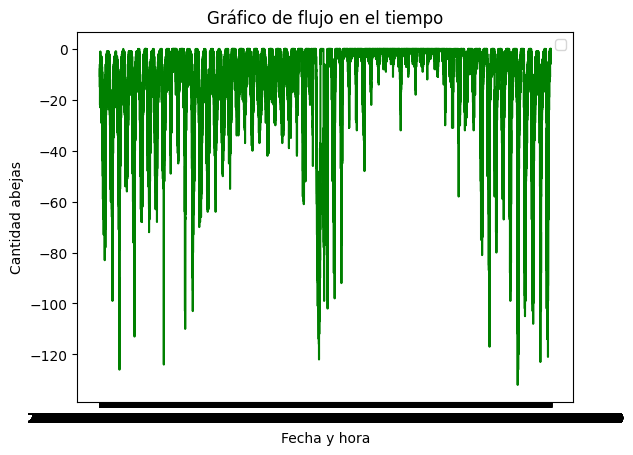

In [83]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(flow['timestamp'], flow['flow'], color='green')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Cantidad abejas')
ax.set_title('Gráfico de flujo en el tiempo')
ax.legend()

# Mostrar el gráfico
plt.show()

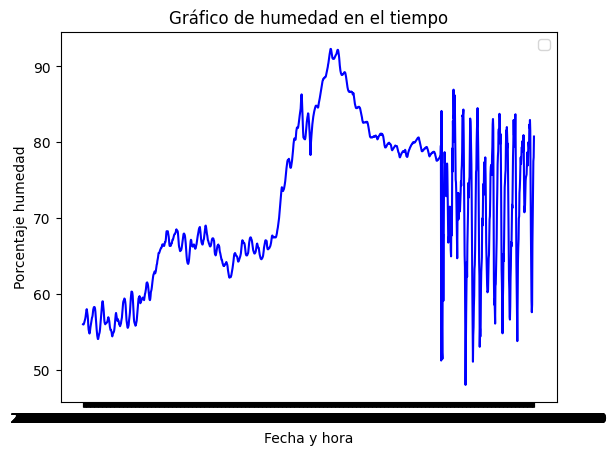

In [84]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(humidity['timestamp'], humidity['humidity'], color='blue')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Porcentaje humedad')
ax.set_title('Gráfico de humedad en el tiempo')
ax.legend()

# Mostrar el gráfico
plt.show()

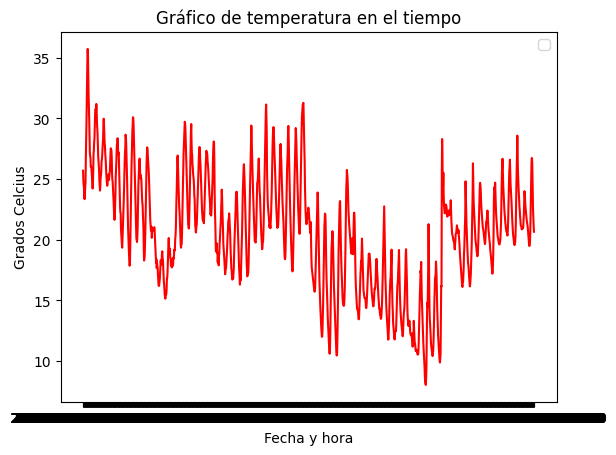

In [85]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(temperature['timestamp'], temperature['temperature'], color='red')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Grados Celcius')
ax.set_title('Gráfico de temperatura en el tiempo')
ax.legend()

# Mostrar el gráfico
plt.show()

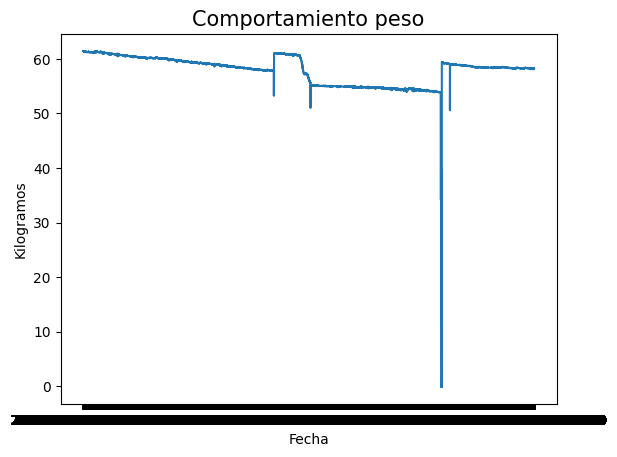

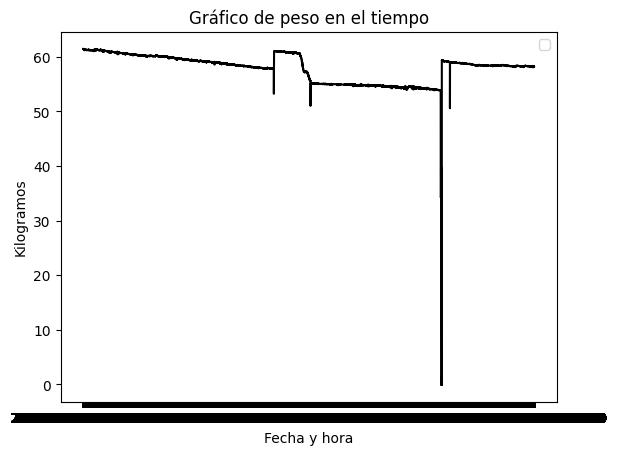

In [86]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(weight['timestamp'], weight['weight'], color='black')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Kilogramos')
ax.set_title('Gráfico de peso en el tiempo')
ax.legend()

# Mostrar el gráfico
plt.show()

<Axes: >

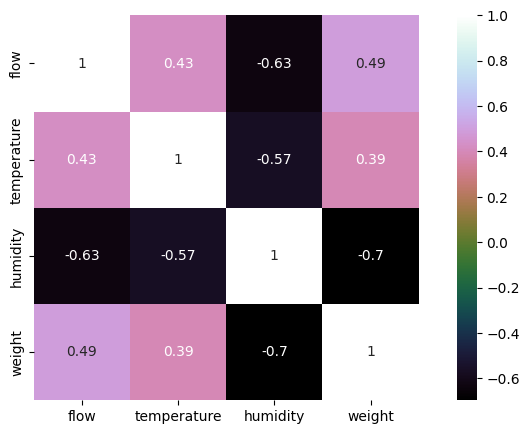

In [87]:
tempHumWei = pd.concat([flow['flow'], temperature['temperature'], humidity['humidity'], weight['weight']], axis=1, join='inner').sort_index()
corr_mat = tempHumWei.corr(method='pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*

In [89]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

flow['flow'] = ss.fit_transform(flow[['flow']])
humidity['humidity'] = ss.fit_transform(humidity[['humidity']])
temperature['temperature'] = ss.fit_transform(temperature[['temperature']])
weight['weight'] = ss.fit_transform(weight[['weight']])

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(flow['timestamp'], flow['flow'], color='green')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Cantidad abejas')
ax.set_title('Gráfico de flujo en el tiempo Normalizado')
ax.legend()

# Mostrar el gráfico
plt.show()

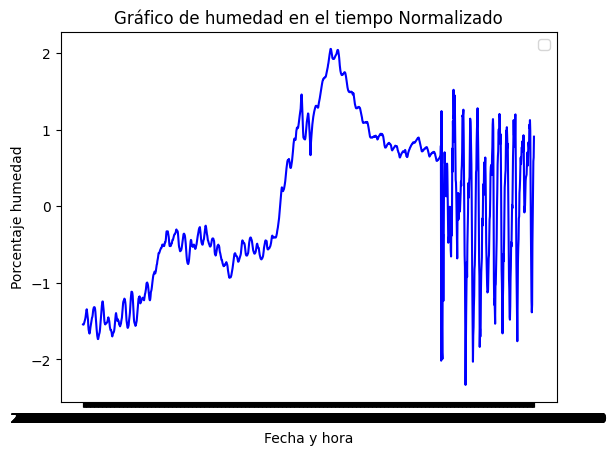

In [90]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(humidity['timestamp'], humidity['humidity'], color='blue')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Porcentaje humedad')
ax.set_title('Gráfico de humedad en el tiempo Normalizado')
ax.legend()

# Mostrar el gráfico
plt.show()

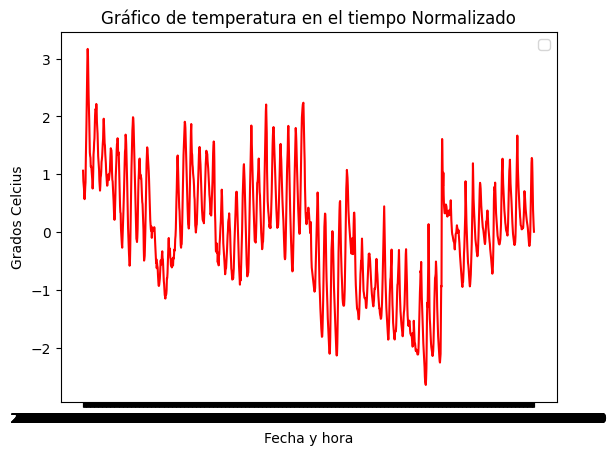

In [91]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(temperature['timestamp'], temperature['temperature'], color='red')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Grados Celcius')
ax.set_title('Gráfico de temperatura en el tiempo Normalizado')
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar las líneas y cambiar sus colores
ax.plot(weight['timestamp'], weight['weight'], color='black')
# Configurar las etiquetas y el título
ax.set_xlabel('Fecha y hora')
ax.set_ylabel('Kilogramos')
ax.set_title('Gráfico de peso en el tiempo Normalizado')
ax.legend()

# Mostrar el gráfico
plt.show()